In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
import pprint
import time
from tensorflow.keras.models import model_from_json


/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
DATADIR = os.path.join(os.getcwd(),"Dataset","Train")
TESTDIR = os.path.join(os.getcwd(),"Dataset","Test")
NAME = "model2"
CATEGORIES = ["BGA","C-Chip","Crystal","Inductor","L-Chip","LED","LGA","QFN","QFP","R-Chip","ResistorsChipArray","SOD","SOIC","SON","SOP","SOT","Tantalum","TSOP"]
training_data = []
test_data = []
print(DATADIR)
TIME = int(time.time())
tensorboard = TensorBoard(log_dir = 'logs/model-{}'.format(TIME))
    

/home/jupyter/Dataset/Train


In [3]:
def load_data():
    for category in CATEGORIES:
        class_num = CATEGORIES.index(category)
        path = os.path.join(DATADIR,category)
        test_path = os.path.join(TESTDIR,category)
        for img in os.listdir(path):
            img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            training_data.append([img_array,class_num])
                
        for img in os.listdir(test_path):
            img_array =cv2.imread(os.path.join(test_path,img),cv2.IMREAD_COLOR)
            test_data.append([img_array,class_num])

    random.shuffle(test_data)



In [4]:
##def fit_model():
load_data()
X,X_test,y,y_test = [],[],[],[]

for img,label in training_data:
    X.append(img)
    y.append(label)
    
for img,label in test_data:
    X_test.append(img)
    y_test.append(label)
      


9760
(9760, 128, 128, 3)


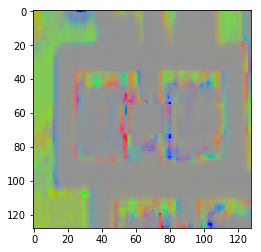

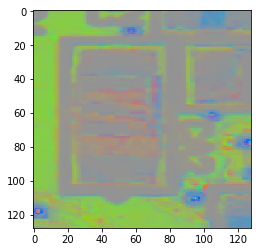

In [5]:
def create_arrays():
    X_temp = np.array(X)
    X_temp = np.append(X_temp,np.rot90(X,k=2, axes=(1,2)),axis=0)
    X_temp = np.append(X_temp,np.rot90(X_temp,k=1, axes=(1,2)),axis=0)
    print(X_temp.shape)
    return X_temp



y = y + y + y + y

y = to_categorical(y)

print(len(y))
y_test = to_categorical(y_test)



#normalize and shuffle data so X stays paired with y

X = create_arrays()
X_test = np.array(X_test)
X_test = normalize(X_test)
X = normalize(X)

randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
y = y[randomize]

#randomize = np.arange(len(X_test))
#np.random.shuffle(randomize)
#X_test = X_test[randomize]
#y_test = y_test[randomize]


plt.imshow(X[0])
plt.show()
plt.imshow(X_test[0])
plt.show()

In [7]:

def create_inception_model():
    input_layer = Input(shape = (128,128,3))
    conv_1 = Conv2D(32, (3,3), padding='same', activation='relu')(input_layer)
    pool = MaxPooling2D((2,2))(conv_1)
    conv_2 = Conv2D(64,(3,3), padding='same',activation='relu')(pool)
    pool_0 = MaxPooling2D((2,2))(conv_2)
    
    layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(pool_0)
    layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)
    layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(pool_0)
    layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)
    layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(pool_0)
    layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)
    layer_4 = Conv2D(10, (1,1), padding= 'same', activation='relu')(pool_0)
    mid_1 = tf.keras.layers.concatenate([layer_1, layer_2, layer_3,layer_4], axis = 3)
    
    
    layer_1 = Conv2D(20, (1,1), padding='same', activation='relu')(mid_1)
    layer_1 = Conv2D(20, (3,3), padding='same', activation='relu')(layer_1)
    layer_2 = Conv2D(20, (1,1), padding='same', activation='relu')(mid_1)
    layer_2 = Conv2D(20, (5,5), padding='same', activation='relu')(layer_2)
    layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(mid_1)
    layer_3 = Conv2D(20, (1,1), padding='same', activation='relu')(layer_3) 
    layer_4 = Conv2D(20, (1,1), padding= 'same', activation='relu')(mid_1)
    mid_2 = tf.keras.layers.concatenate([layer_1, layer_2, layer_3,layer_4], axis = 3)
    
    pool_1 = MaxPooling2D((2,2))(mid_2)    
    
    layer_1 = Conv2D(40, (1,1), padding='same', activation='relu')(pool_1)
    layer_1 = Conv2D(40, (3,3), padding='same', activation='relu')(layer_1)
    layer_2 = Conv2D(40, (1,1), padding='same', activation='relu')(pool_1)
    layer_2 = Conv2D(40, (5,5), padding='same', activation='relu')(layer_2)
    layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(pool_1)
    layer_3 = Conv2D(40, (1,1), padding='same', activation='relu')(layer_3)
    layer_4 = Conv2D(64, (1,1), padding= 'same', activation='relu')(pool_1)
    mid_3 = tf.keras.layers.concatenate([layer_1, layer_2, layer_3,layer_4], axis = 3)
    
    layer_1 = Conv2D(80, (1,1), padding='same', activation='relu')(mid_3)
    layer_1 = Conv2D(80, (3,3), padding='same', activation='relu')(layer_1)
    layer_2 = Conv2D(80, (1,1), padding='same', activation='relu')(mid_3)
    layer_2 = Conv2D(80, (5,5), padding='same', activation='relu')(layer_2)
    layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(mid_3)
    layer_3 = Conv2D(80, (1,1), padding='same', activation='relu')(layer_3)
    layer_4 = Conv2D(64, (1,1), padding= 'same', activation='relu')(mid_3)
    mid_4 = tf.keras.layers.concatenate([layer_1, layer_2, layer_3,layer_4], axis = 3)
    
        
    pool_2 = MaxPooling2D((2,2))(mid_4)
        
    flat = Flatten()(pool_2)
    FC_6 = Dense(1200, activation='relu')(flat)
    drop_1 = Dropout(0.4)(FC_6)
    FC_7 = Dense(600, activation='relu')(drop_1)
    drop_2 = Dropout(0.4)(FC_7)
    FC_8 = Dense(150, activation='relu')(drop_2)

    output_layer = Dense(18, activation = 'softmax') (FC_8)
    model = Model(input_layer,output_layer)

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [8]:
print(X.shape)
print(X_test.shape)

model = create_inception_model()
checkpoint = ModelCheckpoint("{}.h5".format(NAME), monitor='val_loss', verbose=1, save_best_only=True, mode='min')

history = model.fit(X,y,epochs=100, validation_data=(X_test,y_test), callbacks=[tensorboard, checkpoint] )

W0925 02:03:23.862051 140289758766848 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(9760, 128, 128, 3)
(1698, 128, 128, 3)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   18496       max_pooling2d[0][0]              
______________________________________________________

W0925 02:03:38.765357 140289758766848 callbacks.py:257] Method (on_train_batch_end) is slow compared to the batch update (0.134558). Check your callbacks.


9760/9760 [==============================] - 47s 5ms/sample - loss: 1.5122 - acc: 0.5161 - val_loss: 1.3915 - val_acc: 0.5854
Epoch 2/100
9760/9760 [==============================] - 41s 4ms/sample - loss: 0.8009 - acc: 0.7299 - val_loss: 1.3380 - val_acc: 0.6678
Epoch 3/100
9760/9760 [==============================] - 41s 4ms/sample - loss: 0.4846 - acc: 0.8361 - val_loss: 0.9214 - val_acc: 0.7356
Epoch 4/100
9760/9760 [==============================] - 41s 4ms/sample - loss: 0.3284 - acc: 0.8851 - val_loss: 0.6926 - val_acc: 0.8380
Epoch 5/100
9760/9760 [==============================] - 41s 4ms/sample - loss: 0.2600 - acc: 0.9091 - val_loss: 0.9847 - val_acc: 0.7226
Epoch 6/100
9760/9760 [==============================] - 41s 4ms/sample - loss: 0.2043 - acc: 0.9308 - val_loss: 0.7883 - val_acc: 0.8428
Epoch 7/100
9760/9760 [==============================] - 41s 4ms/sample - loss: 0.1368 - acc: 0.9540 - val_loss: 0.6813 - val_acc: 0.8628
Epoch 8/100
9760/9760 [=======================

In [9]:
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
print("Saved model to disk")

Saved model to disk


In [10]:
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("{}.h5".format(NAME))
def generate_classification_report(images,labels,model):
    pred = np.array(model.predict(images))
    pred = np.reshape(pred,len(labels))
    pred = pred.astype(int)
    labels = np.array(labels)
    return classification_report(labels,pred)


W0925 03:11:54.193666 140289758766848 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0925 03:11:54.195530 140289758766848 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for {"config": {"layers": [{"config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "name": "input_1", "sparse": false}, "class_name": "InputLayer", "name": "input_1", "inbound_nodes": []}, {"config": {"filters": 32, "name": "conv2d", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [3, 3], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"config": {"strides": [2, 2], "name": "max_pooling2d", "trainable": true, "data_format": "channels_last", "padding": "valid", "pool_size": [2, 2], "dtype": "float32"}, "class_name": "MaxPooling2D", "name": "max_pooling2d", "inbound_nodes": [[["conv2d", 0, 0, {}]]]}, {"config": {"filters": 64, "name": "conv2d_1", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [3, 3], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_1", "inbound_nodes": [[["max_pooling2d", 0, 0, {}]]]}, {"config": {"strides": [2, 2], "name": "max_pooling2d_1", "trainable": true, "data_format": "channels_last", "padding": "valid", "pool_size": [2, 2], "dtype": "float32"}, "class_name": "MaxPooling2D", "name": "max_pooling2d_1", "inbound_nodes": [[["conv2d_1", 0, 0, {}]]]}, {"config": {"filters": 10, "name": "conv2d_2", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_2", "inbound_nodes": [[["max_pooling2d_1", 0, 0, {}]]]}, {"config": {"filters": 10, "name": "conv2d_4", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_4", "inbound_nodes": [[["max_pooling2d_1", 0, 0, {}]]]}, {"config": {"strides": [1, 1], "name": "max_pooling2d_2", "trainable": true, "data_format": "channels_last", "padding": "same", "pool_size": [3, 3], "dtype": "float32"}, "class_name": "MaxPooling2D", "name": "max_pooling2d_2", "inbound_nodes": [[["max_pooling2d_1", 0, 0, {}]]]}, {"config": {"filters": 10, "name": "conv2d_3", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [3, 3], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_3", "inbound_nodes": [[["conv2d_2", 0, 0, {}]]]}, {"config": {"filters": 10, "name": "conv2d_5", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [5, 5], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_5", "inbound_nodes": [[["conv2d_4", 0, 0, {}]]]}, {"config": {"filters": 10, "name": "conv2d_6", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_6", "inbound_nodes": [[["max_pooling2d_2", 0, 0, {}]]]}, {"config": {"filters": 10, "name": "conv2d_7", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_7", "inbound_nodes": [[["max_pooling2d_1", 0, 0, {}]]]}, {"config": {"trainable": true, "name": "concatenate", "axis": 3, "dtype": "float32"}, "class_name": "Concatenate", "name": "concatenate", "inbound_nodes": [[["conv2d_3", 0, 0, {}], ["conv2d_5", 0, 0, {}], ["conv2d_6", 0, 0, {}], ["conv2d_7", 0, 0, {}]]]}, {"config": {"filters": 20, "name": "conv2d_8", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_8", "inbound_nodes": [[["concatenate", 0, 0, {}]]]}, {"config": {"filters": 20, "name": "conv2d_10", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_10", "inbound_nodes": [[["concatenate", 0, 0, {}]]]}, {"config": {"strides": [1, 1], "name": "max_pooling2d_3", "trainable": true, "data_format": "channels_last", "padding": "same", "pool_size": [3, 3], "dtype": "float32"}, "class_name": "MaxPooling2D", "name": "max_pooling2d_3", "inbound_nodes": [[["concatenate", 0, 0, {}]]]}, {"config": {"filters": 20, "name": "conv2d_9", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [3, 3], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_9", "inbound_nodes": [[["conv2d_8", 0, 0, {}]]]}, {"config": {"filters": 20, "name": "conv2d_11", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [5, 5], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_11", "inbound_nodes": [[["conv2d_10", 0, 0, {}]]]}, {"config": {"filters": 20, "name": "conv2d_12", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_12", "inbound_nodes": [[["max_pooling2d_3", 0, 0, {}]]]}, {"config": {"filters": 20, "name": "conv2d_13", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_13", "inbound_nodes": [[["concatenate", 0, 0, {}]]]}, {"config": {"trainable": true, "name": "concatenate_1", "axis": 3, "dtype": "float32"}, "class_name": "Concatenate", "name": "concatenate_1", "inbound_nodes": [[["conv2d_9", 0, 0, {}], ["conv2d_11", 0, 0, {}], ["conv2d_12", 0, 0, {}], ["conv2d_13", 0, 0, {}]]]}, {"config": {"strides": [2, 2], "name": "max_pooling2d_4", "trainable": true, "data_format": "channels_last", "padding": "valid", "pool_size": [2, 2], "dtype": "float32"}, "class_name": "MaxPooling2D", "name": "max_pooling2d_4", "inbound_nodes": [[["concatenate_1", 0, 0, {}]]]}, {"config": {"filters": 40, "name": "conv2d_14", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_14", "inbound_nodes": [[["max_pooling2d_4", 0, 0, {}]]]}, {"config": {"filters": 40, "name": "conv2d_16", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_16", "inbound_nodes": [[["max_pooling2d_4", 0, 0, {}]]]}, {"config": {"strides": [1, 1], "name": "max_pooling2d_5", "trainable": true, "data_format": "channels_last", "padding": "same", "pool_size": [3, 3], "dtype": "float32"}, "class_name": "MaxPooling2D", "name": "max_pooling2d_5", "inbound_nodes": [[["max_pooling2d_4", 0, 0, {}]]]}, {"config": {"filters": 40, "name": "conv2d_15", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [3, 3], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_15", "inbound_nodes": [[["conv2d_14", 0, 0, {}]]]}, {"config": {"filters": 40, "name": "conv2d_17", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [5, 5], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_17", "inbound_nodes": [[["conv2d_16", 0, 0, {}]]]}, {"config": {"filters": 40, "name": "conv2d_18", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_18", "inbound_nodes": [[["max_pooling2d_5", 0, 0, {}]]]}, {"config": {"filters": 64, "name": "conv2d_19", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_19", "inbound_nodes": [[["max_pooling2d_4", 0, 0, {}]]]}, {"config": {"trainable": true, "name": "concatenate_2", "axis": 3, "dtype": "float32"}, "class_name": "Concatenate", "name": "concatenate_2", "inbound_nodes": [[["conv2d_15", 0, 0, {}], ["conv2d_17", 0, 0, {}], ["conv2d_18", 0, 0, {}], ["conv2d_19", 0, 0, {}]]]}, {"config": {"filters": 80, "name": "conv2d_20", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_20", "inbound_nodes": [[["concatenate_2", 0, 0, {}]]]}, {"config": {"filters": 80, "name": "conv2d_22", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_22", "inbound_nodes": [[["concatenate_2", 0, 0, {}]]]}, {"config": {"strides": [1, 1], "name": "max_pooling2d_6", "trainable": true, "data_format": "channels_last", "padding": "same", "pool_size": [3, 3], "dtype": "float32"}, "class_name": "MaxPooling2D", "name": "max_pooling2d_6", "inbound_nodes": [[["concatenate_2", 0, 0, {}]]]}, {"config": {"filters": 80, "name": "conv2d_21", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [3, 3], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_21", "inbound_nodes": [[["conv2d_20", 0, 0, {}]]]}, {"config": {"filters": 80, "name": "conv2d_23", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [5, 5], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_23", "inbound_nodes": [[["conv2d_22", 0, 0, {}]]]}, {"config": {"filters": 80, "name": "conv2d_24", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_24", "inbound_nodes": [[["max_pooling2d_6", 0, 0, {}]]]}, {"config": {"filters": 64, "name": "conv2d_25", "trainable": true, "bias_regularizer": null, "data_format": "channels_last", "padding": "same", "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "dilation_rate": [1, 1], "strides": [1, 1], "dtype": "float32", "kernel_size": [1, 1], "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}}, "class_name": "Conv2D", "name": "conv2d_25", "inbound_nodes": [[["concatenate_2", 0, 0, {}]]]}, {"config": {"trainable": true, "name": "concatenate_3", "axis": 3, "dtype": "float32"}, "class_name": "Concatenate", "name": "concatenate_3", "inbound_nodes": [[["conv2d_21", 0, 0, {}], ["conv2d_23", 0, 0, {}], ["conv2d_24", 0, 0, {}], ["conv2d_25", 0, 0, {}]]]}, {"config": {"strides": [2, 2], "name": "max_pooling2d_7", "trainable": true, "data_format": "channels_last", "padding": "valid", "pool_size": [2, 2], "dtype": "float32"}, "class_name": "MaxPooling2D", "name": "max_pooling2d_7", "inbound_nodes": [[["concatenate_3", 0, 0, {}]]]}, {"config": {"data_format": "channels_last", "name": "flatten", "trainable": true, "dtype": "float32"}, "class_name": "Flatten", "name": "flatten", "inbound_nodes": [[["max_pooling2d_7", 0, 0, {}]]]}, {"config": {"units": 1200, "name": "dense", "trainable": true, "bias_regularizer": null, "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}, "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "dtype": "float32"}, "class_name": "Dense", "name": "dense", "inbound_nodes": [[["flatten", 0, 0, {}]]]}, {"config": {"seed": null, "name": "dropout", "trainable": true, "rate": 0.4, "noise_shape": null, "dtype": "float32"}, "class_name": "Dropout", "name": "dropout", "inbound_nodes": [[["dense", 0, 0, {}]]]}, {"config": {"units": 600, "name": "dense_1", "trainable": true, "bias_regularizer": null, "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}, "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "dtype": "float32"}, "class_name": "Dense", "name": "dense_1", "inbound_nodes": [[["dropout", 0, 0, {}]]]}, {"config": {"seed": null, "name": "dropout_1", "trainable": true, "rate": 0.4, "noise_shape": null, "dtype": "float32"}, "class_name": "Dropout", "name": "dropout_1", "inbound_nodes": [[["dense_1", 0, 0, {}]]]}, {"config": {"units": 150, "name": "dense_2", "trainable": true, "bias_regularizer": null, "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}, "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "relu", "activity_regularizer": null, "kernel_constraint": null, "dtype": "float32"}, "class_name": "Dense", "name": "dense_2", "inbound_nodes": [[["dropout_1", 0, 0, {}]]]}, {"config": {"units": 18, "name": "dense_3", "trainable": true, "bias_regularizer": null, "kernel_regularizer": null, "bias_constraint": null, "use_bias": true, "kernel_initializer": {"config": {"seed": null, "dtype": "float32"}, "class_name": "GlorotUniform"}, "bias_initializer": {"config": {"dtype": "float32"}, "class_name": "Zeros"}, "activation": "softmax", "activity_regularizer": null, "kernel_constraint": null, "dtype": "float32"}, "class_name": "Dense", "name": "dense_3", "inbound_nodes": [[["dense_2", 0, 0, {}]]]}], "output_layers": [["dense_3", 0, 0]], "name": "model", "input_layers": [["input_1", 0, 0]]}, "keras_version": "2.2.4-tf", "backend": "tensorflow", "class_name": "Model"}